In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels import regression
import statsmodels.api as sm
import xlsxwriter

# Data Processing

In [2]:
data = pd.read_excel("Four_Centuries_Consolidated_Data.xlsx", index_col=0,skiprows=1)

In [3]:
data.tail(10)

,Price_Nominal,Dividend_Nominal,Price_Real,Dividend_Real,CPI,Recession,Div_Earnings,Risk_free_r,Country,Price_Nominal_Normalized,Price_Real_Normalized
Year,,,,,,,,,,,
2006,1418.300000,24.881000,1662.355835,29.162431,201.800,0,0.411169,0.040611,US,405915.079287,405915.079287
2007,1468.355200,27.731000,1653.538982,31.228336,210.036,0,0.409767,0.040611,US,420240.793506,420240.793506
2008,903.250000,28.387000,1016.235736,31.937873,210.228,1,0.438638,0.040611,US,258508.633834,258508.633834
2009,1115.100000,22.407291,1221.348686,24.542297,215.949,1,0.437428,0.040611,US,319139.748229,319139.748229
2010,1257.640000,22.730000,1357.170628,24.528870,219.179,0,0.421240,0.040611,US,359934.456966,359934.456966
2011,1257.600000,26.425000,1318.080400,27.695829,225.672,0,0.404335,0.040611,US,359923.009033,359923.009033
2012,1426.190000,31.247000,1469.199131,32.189305,229.601,0,0.395896,0.040611,US,408173.184043,408173.184043
2013,1848.360000,34.990000,1875.928878,35.511887,233.049,0,0.387888,0.040611,US,528997.529402,528997.529402
2014,2058.900000,39.440000,2073.920083,39.727723,234.812,0,0.386529,0.040611,US,589253.723997,589253.723997


In [4]:
#Put the data into a dataframe
df_data=pd.DataFrame(data)

In [5]:
#Create a folder "Charts" where you have the files

In [6]:
# Create a loop over all columns
# withing theloop, plot and save each individual time series
for col in data.iteritems():
    print('plotting'+col[0])
    fig, ax = plt.subplots()
    indicator=data[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    plt.savefig('Charts\Plot_'+col[0]+'.png')
    plt.close()


plottingPrice_Nominal
plottingDividend_Nominal
plottingPrice_Real
plottingDividend_Real
plottingCPI
plottingRecession
plottingDiv_Earnings
plottingRisk_free_r
plottingCountry
plottingPrice_Nominal_Normalized
plottingPrice_Real_Normalized


# Correcting Inflation and Working with Subsamples

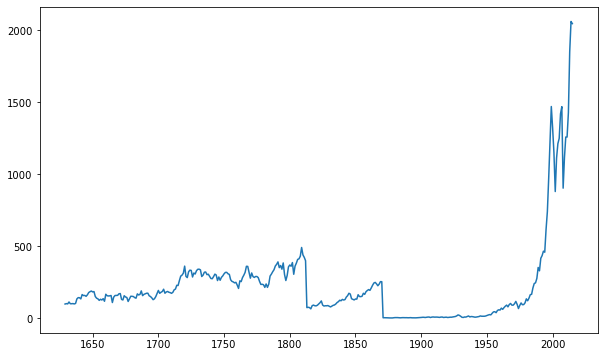

In [68]:

# plot one series
plt.figure(figsize=(10, 6))
plt.plot(data['Price_Nominal'])
plt.show()


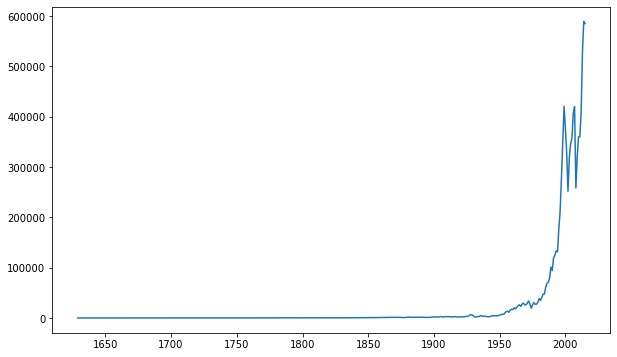

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(data['Price_Nominal_Normalized'])
plt.show()


In [70]:
# Calculate Simple Price Returns
data['Return_Nominal']= (data['Price_Nominal_Normalized'] - data['Price_Nominal_Normalized'].shift(1))/data['Price_Nominal_Normalized'].shift(1)
data['Return_Real']= (data['Price_Real_Normalized'] - data['Price_Real_Normalized'].shift(1))/data['Price_Real_Normalized'].shift(1)
data[['Return_Nominal','Return_Real']].describe()

,Return_Nominal,Return_Real
count,386.000000,380.000000
mean,0.032086,0.032240
std,0.137623,0.147017
min,-0.470665,-0.470665
25%,-0.039474,-0.051174
50%,0.024584,0.026062
75%,0.107836,0.118741
max,0.465893,0.473623


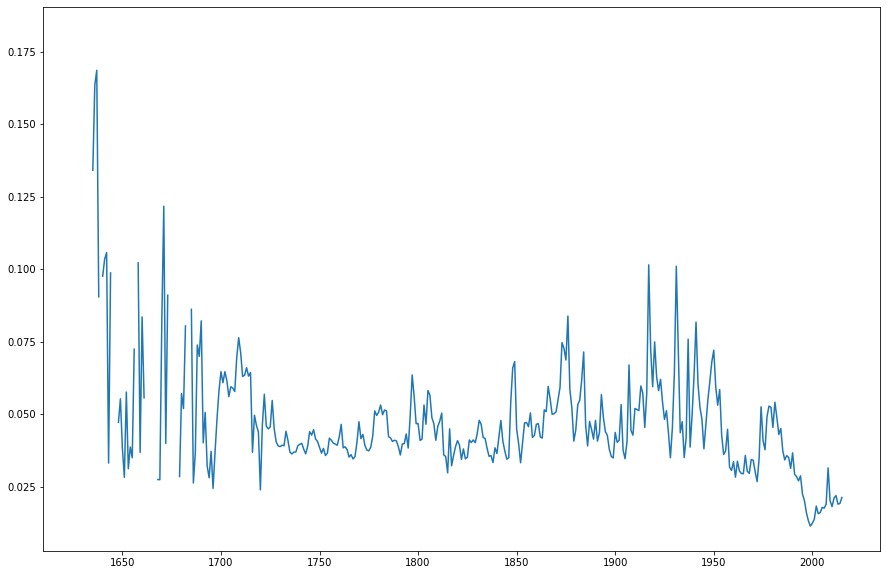

In [71]:
# Create dividend yield ratios
data['DP_Nominal']= data['Dividend_Nominal'] /data['Price_Nominal']
data['DP_Real']= data['Dividend_Real'] /data['Price_Real']
plt.figure(figsize=(15, 10))
plt.plot(data['DP_Real'])
plt.show()

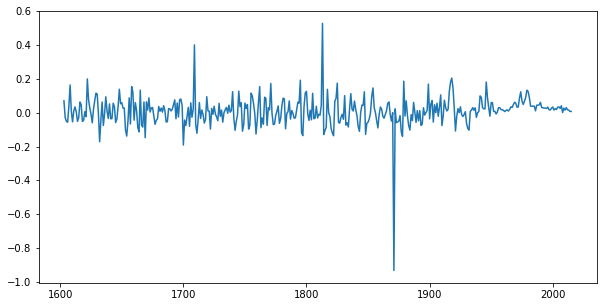

In [72]:
# Inflation Calculation
data['Inflation']=(data['CPI'] - data['CPI'].shift(1))/data['CPI'].shift(1)
plt.figure(figsize=(10, 5))
plt.plot(data['Inflation'])
plt.show()

In [73]:
#identify manually the year (row number) where the inflation drops
data['Inflation'][269:270]

Year
1871   -0.932066
Name: Inflation, dtype: float64

In [74]:
#identify just one single row where the data appears wrong
#replace ('student_input_here') with [number:number]
print('Before Adjustment',data['Inflation'][269:270])


Before Adjustment Year
1871   -0.932066
Name: Inflation, dtype: float64


In [75]:
#correct the error here by replacing the value with 0 
#replace ('student_input_here') with [number:number]

data['Inflation'][269:270] = 0
print('-------------')
print('After Adjustment',data['Inflation'][269:270])


-------------
After Adjustment Year
1871    0.0
Name: Inflation, dtype: float64


<ipython-input-75-4098a6066b54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Inflation'][269:270] = 0


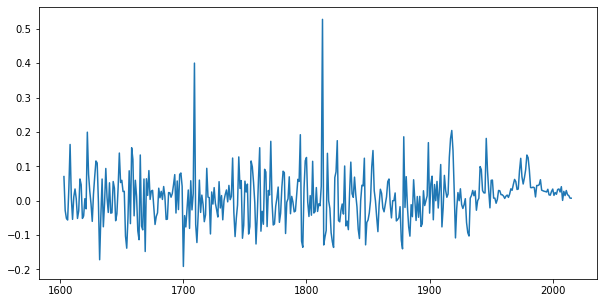

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(data['Inflation'])
plt.show()

In [77]:
abc = round(np.average(data['Inflation'][50:]),3)
abc

0.011

In [78]:
# dealing with missing data
df_1=pd.DataFrame(data)
df_1.head(2)

,Price_Nominal,Dividend_Nominal,Price_Real,Dividend_Real,CPI,Recession,Div_Earnings,Risk_free_r,Country,Price_Nominal_Normalized,Price_Real_Normalized,Return_Nominal,Return_Real,DP_Nominal,DP_Real,Inflation
Year,,,,,,,,,,,,,,,,
1602,NaN,NaN,NaN,NaN,90.376211,10,NaN,0.033503,NL_UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,NaN,NaN,NaN,NaN,96.724030,10,NaN,0.033503,NL_UK,NaN,NaN,NaN,NaN,NaN,NaN,0.070238


In [79]:
#drop rows containing at least one NA, use inplace
df_1.dropna(axis = 0,inplace= True)
df_1.head(2)

,Price_Nominal,Dividend_Nominal,Price_Real,Dividend_Real,CPI,Recession,Div_Earnings,Risk_free_r,Country,Price_Nominal_Normalized,Price_Real_Normalized,Return_Nominal,Return_Real,DP_Nominal,DP_Real,Inflation
Year,,,,,,,,,,,,,,,,
1670,170.815623,14.006734,281.415425,23.075823,126.981816,10,1.069543,0.033503,NL_UK,170.815623,281.415425,0.067418,0.003320,0.081999,0.081999,0.063886
1671,172.632997,21.010101,280.095864,34.088746,128.937414,10,0.909810,0.033503,NL_UK,172.632997,280.095864,0.010639,-0.004689,0.121704,0.121704,0.015401


In [80]:
#drop columns with at least one observation missing
df_1=pd.DataFrame(data)
df_1.head(2)
df_1.dropna(axis='columns',inplace=True)
df_1.head(2)

,CPI,Recession,Risk_free_r,Country
Year,,,,
1602,90.376211,10,0.033503,NL_UK
1603,96.724030,10,0.033503,NL_UK


In [146]:
#drop columns with function "all"
df_1=pd.DataFrame(data)
df_1.head(2)
df_1.dropna(axis='columns',how='all',inplace=True)
df_1.head(2)

,Price_Nominal,Dividend_Nominal,Price_Real,Dividend_Real,CPI,Recession,Div_Earnings,Risk_free_r,Country,Price_Nominal_Normalized,Price_Real_Normalized,Return_Nominal,Return_Real,DP_Nominal,DP_Real,Inflation
Year,,,,,,,,,,,,,,,,
1602,NaN,NaN,NaN,NaN,90.376211,10,NaN,0.033503,NL_UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,NaN,NaN,NaN,NaN,96.724030,10,NaN,0.033503,NL_UK,NaN,NaN,NaN,NaN,NaN,NaN,0.070238


In [147]:
#drop rows and count how many have been removed
df_clean=pd.DataFrame(data)
df_clean.dropna(axis='rows',inplace=True)

print('table size before cleaning:', df_1.shape)

#STUDENTS --> clean the rows if data not available
print('table size after cleaning:', df_clean.shape)



table size before cleaning: (414, 16)
table size after cleaning: (263, 16)


# Sub-samples

In [148]:
# Create smaller datasets by selecting dates from the index
sample_1=data[27:210] # 1629_1812
sample_2=data[211:269] # 1813_1870
sample_3=data[269:344] # 1871_1945
sample_4=data[344:415] # 1945_2015 
sample_5=data[27:415] # 1629_2015 



In [149]:
sample_5

,Price_Nominal,Dividend_Nominal,Price_Real,Dividend_Real,CPI,Recession,Div_Earnings,Risk_free_r,Country,Price_Nominal_Normalized,Price_Real_Normalized,Return_Nominal,Return_Real,DP_Nominal,DP_Real,Inflation
Year,,,,,,,,,,,,,,,,
1629,100.000000,13.227513,149.633232,19.792756,139.808568,10,NaN,0.033503,NL_UK,100.000000,149.633232,NaN,NaN,0.132275,0.132275,0.115686
1630,102.645503,NaN,NaN,NaN,155.146661,10,NaN,0.033503,NL_UK,102.645503,NaN,0.026455,NaN,NaN,NaN,0.109708
1631,101.000000,9.259259,136.667795,12.529134,154.602684,10,NaN,0.033503,NL_UK,101.000000,136.667795,-0.016031,NaN,0.091676,0.091676,-0.003506
1632,114.124294,NaN,NaN,NaN,128.042914,10,NaN,0.033503,NL_UK,114.124294,NaN,0.129944,NaN,NaN,NaN,-0.171794
1633,102.000000,18.545198,174.169513,31.666746,122.515173,10,NaN,0.033503,NL_UK,102.000000,174.169513,-0.106238,NaN,0.181816,0.181816,-0.043171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1257.600000,26.425000,1318.080400,27.695829,225.672000,0,0.404335,0.040611,US,359923.009033,359923.009033,-0.000032,-0.000032,0.021012,0.021012,0.029624
2012,1426.190000,31.247000,1469.199131,32.189305,229.601000,0,0.395896,0.040611,US,408173.184043,408173.184043,0.134057,0.134057,0.021909,0.021909,0.017410
2013,1848.360000,34.990000,1875.928878,35.511887,233.049000,0,0.387888,0.040611,US,528997.529402,528997.529402,0.296012,0.296012,0.018930,0.018930,0.015017


In [150]:
# Write a function for creating empty tables with NaNs
def nans(shape, dtype=float):
    a = np.empty(shape, dtype)
    a.fill(np.nan)
    return a



In [151]:
# Create the Table for Descriptive Statistics
subsample_list=['Statistic','1629–1812','1813–1870','1871–1945','1945–2015','1629-2015']


# Student Task - create a [6x6] table using your nans function
table_empty = nans([6,6])

desc_stat_table = pd.DataFrame(table_empty,columns=subsample_list)
desc_stat_table

,Statistic,1629–1812,1813–1870,1871–1945,1945–2015,1629-2015
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
#desc_stat_table['Statistic'][0]= 'Real Mean Dividend Yield'
desc_stat_table.iloc[0, 0]= 'Real Mean Dividend Yield'
desc_stat_table.iloc[1, 0]= 'Mean Inflation'
desc_stat_table.iloc[2, 0]= 'Nominal Arithmetic Return'
desc_stat_table.iloc[3, 0]= 'Nominal Standard Deviation of Returns'
desc_stat_table.iloc[4, 0]= 'Nominal Risk-free rate'
desc_stat_table.iloc[5, 0]= 'Nominal Sharpe Ratio'
desc_stat_table

,Statistic,1629–1812,1813–1870,1871–1945,1945–2015,1629-2015
0,Real Mean Dividend Yield,NaN,NaN,NaN,NaN,NaN
1,Mean Inflation,NaN,NaN,NaN,NaN,NaN
2,Nominal Arithmetic Return,NaN,NaN,NaN,NaN,NaN
3,Nominal Standard Deviation of Returns,NaN,NaN,NaN,NaN,NaN
4,Nominal Risk-free rate,NaN,NaN,NaN,NaN,NaN
5,Nominal Sharpe Ratio,NaN,NaN,NaN,NaN,NaN


In [153]:
#student task - fill you nxn table using automatic commands for averages, standard eviations, etc.
#ilog: um etwas hineinzuschreiben

samples = [sample_1,sample_2,sample_3,sample_4,sample_5]
a=1

for b in samples:
    desc_stat_table.iloc[0, a] = round(np.average(b['DP_Real']),3)
    desc_stat_table.iloc[1, a] = round(np.average(b['Inflation']),3)
    desc_stat_table.iloc[2, a] = round(np.average(b['Return_Nominal']),3)
    desc_stat_table.iloc[3, a] = round(np.average(b['Return_Nominal']),3)
    #desc_stat_table.iloc[4, a] = round(np.average(b['Risk_free_r'],3)
    #desc_stat_table.iloc[5, a] = round(np.average(b[('Return_Nominal'- 'Risk_free_r')/'Inflation'],3)
                                                  
    a=a+1
    print(a)

desc_stat_table
    

2
3
4
5
6


,Statistic,1629–1812,1813–1870,1871–1945,1945–2015,1629-2015
0,Real Mean Dividend Yield,NaN,0.043,0.053,0.034,NaN
1,Mean Inflation,0.005,0.002,0.007,0.038,0.011
2,Nominal Arithmetic Return,NaN,0.025,0.037,0.084,NaN
3,Nominal Standard Deviation of Returns,NaN,0.025,0.037,0.084,NaN
4,Nominal Risk-free rate,NaN,NaN,NaN,NaN,NaN
5,Nominal Sharpe Ratio,NaN,NaN,NaN,NaN,NaN


In [154]:
#export this table to excel
desc_stat_table.to_excel("Four_Cent_Descriptive_Stats_20_03_2021.xls")

In [155]:
round(np.average('Return_Nominal'/'Risk_free_r'),3)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

# Normality Tests

In [156]:
#Histograms for each individual series  

# first create a dataframe

df=pd.DataFrame(data)
df.dropna(axis='rows',inplace=True)

for col in df.iteritems(): 
    print('histogram'+col[0])
    fig, ax = plt.subplots()
    indicator=df[col[0]]
    ax.hist(indicator, alpha=0.9, color='blue',bins=20)
    plt.title(col[0])
    plt.savefig('Charts\Hist_'+col[0]+'.png')
    plt.close()
    


histogramPrice_Nominal
histogramDividend_Nominal
histogramPrice_Real
histogramDividend_Real
histogramCPI
histogramRecession
histogramDiv_Earnings
histogramRisk_free_r
histogramCountry
histogramPrice_Nominal_Normalized
histogramPrice_Real_Normalized
histogramReturn_Nominal
histogramReturn_Real
histogramDP_Nominal
histogramDP_Real
histogramInflation


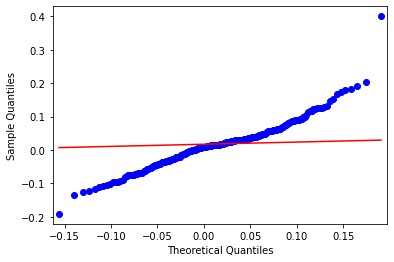

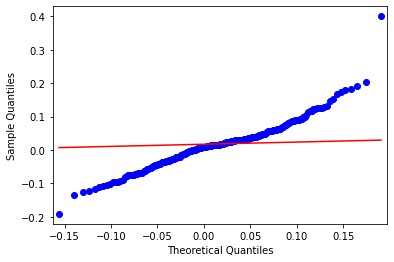

In [157]:
#Q-Q Plot for Inflation - Zusatz

import statsmodels.api as sm
import pylab
import statistics 

Inflation=df['Inflation']

mean1=statistics.mean(Inflation) 
st_dev1=statistics.stdev(Inflation)
obs_count1=len(Inflation)

sm.qqplot(Inflation, loc = mean1, scale = st_dev1, line='s')

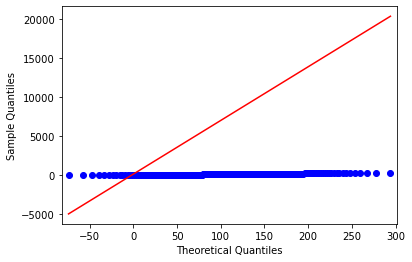

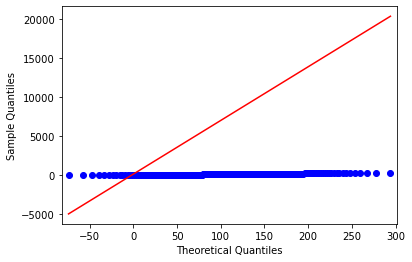

In [158]:
#Q-Q Plot for CPI
import statsmodels.api as sm
import pylab
import statistics 

cpi=df['CPI']

mean1=statistics.mean(cpi) 
st_dev1=statistics.stdev(cpi)
obs_count1=len(cpi)

sm.qqplot(cpi, loc = mean1, scale = st_dev1, line='s')

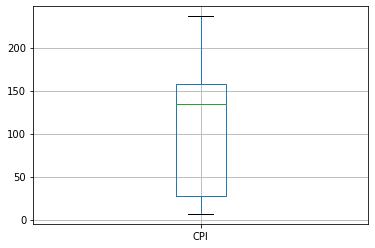

In [159]:
#boxplot CPI
boxplot1=df.boxplot(column=['CPI'])
plt.show()


In [160]:
#Shapiro-Wilk Normality Test

stat,p=sp.stats.shapiro(cpi)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
1.3323985469625155e-13
Sample does not look Gaussian (reject H0)


In [161]:
# P ist klein, wird rejected

In [162]:
# Student Task 
# Create a QQ chart for inflation

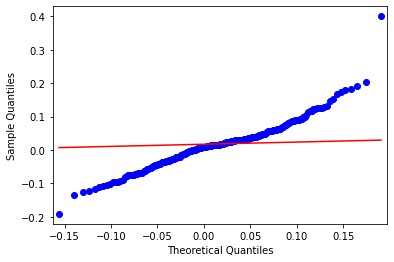

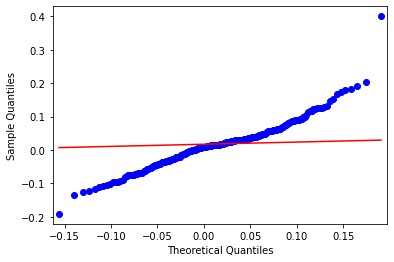

In [163]:
#Q-Q Plot for Inflation

import statsmodels.api as sm
import pylab
import statistics 

Inflation=df['Inflation']

mean1=statistics.mean(Inflation) 
st_dev1=statistics.stdev(Inflation)
obs_count1=len(Inflation)

sm.qqplot(Inflation, loc = mean1, scale = st_dev1, line='s')

In [164]:
# Student Task 
# Calculate the Shapiro-Wilk for inflation based on the procedure for CPI
stat,p=sp.stats.shapiro(Inflation)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
2.1075011957805145e-08
Sample does not look Gaussian (reject H0)


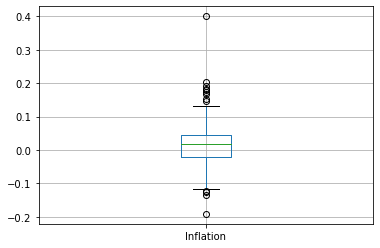

In [165]:
# Student Task 
# create a box plot for inflation
boxplot1=df.boxplot(column=['Inflation'])
plt.show()

# Student Task - Kurtosis, Skewness and JB Test

In [166]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [167]:
#Use this reference: https://github.com/quantopian/research_public/blob/master/notebooks/lectures/Statistical_Moments/notebook.ipynb

In [168]:
#calculate mean, median and skewness, kurtosis for CPI

plt.plot(xs,stats.laplace.pdf(xs), label='CPI')
print 'Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='CPI'))
plt.plot(xs, normal, label='CPI')
print 'Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(moments='CPI'))
plt.plot(xs,stats.cosine.pdf(xs), label='CPI')
print 'Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(moments='CPI'))
plt.legend();

SyntaxError: invalid syntax (<ipython-input-168-7f971e3b1bc7>, line 4)

In [169]:
#calculate mean, median and skewness, kurtosis for Inflation

In [170]:
#calculate JB statistic for CPI
from statsmodels.stats.stattools import jarque_bera

N = 387
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
# count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print (num_significant) / N

15


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [ ]:
#calculate JB statistic for Inflation

In [ ]:
pricing = get_pricing('', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

print 'Skew:', stats.skew(returns)
print 'Mean:', np.mean(returns)
print 'Median:', np.median(returns)

plt.hist(returns, 30);